In [1]:
import pandas as pd
import numpy as np
from ultralytics import YOLO
import torch

import shutil
import os

import random

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


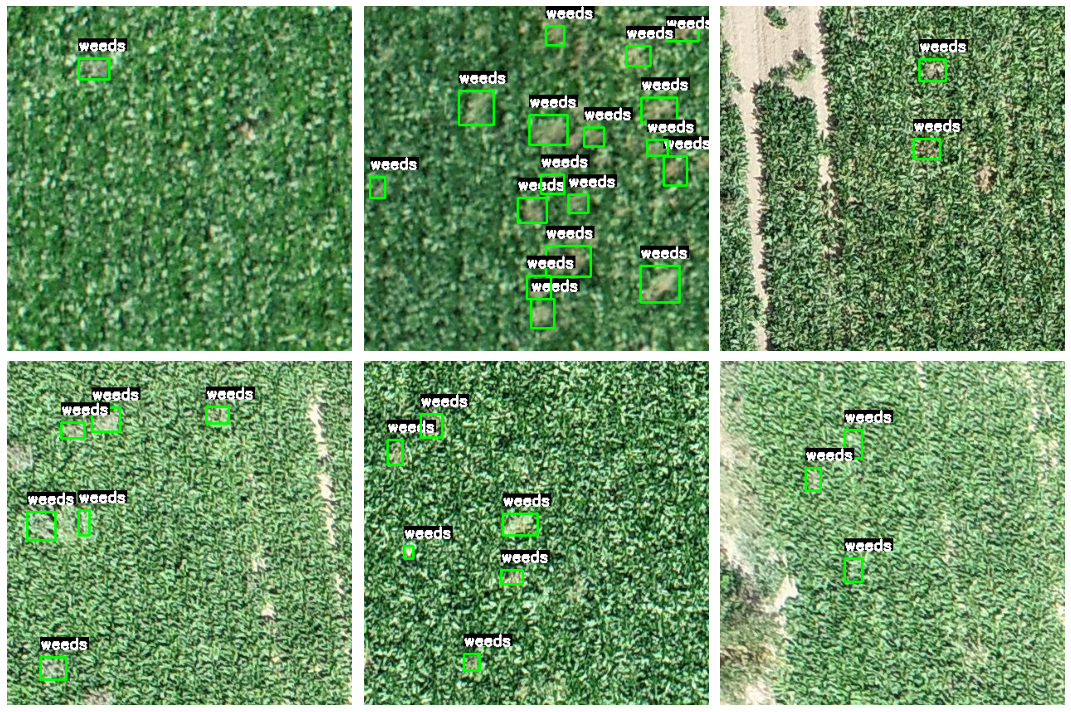

In [2]:
import yaml
random.seed(42)

# Папки с изображениями и метками
images_folder = "train/images"
labels_folder = "train/labels"

# Загрузка списка файлов изображений
image_files = os.listdir(images_folder)

# Выбор случайных изображений
random.shuffle(image_files)
random_image_files = image_files[:6]

# Отображение случайных изображений с метками
num_images = len(random_image_files)
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()


with open("data.yaml", "r") as f:
    data = yaml.safe_load(f)
classes = data["names"]  # Список классов

for i in range(num_images):
    # Загрузка изображения
    image_file = os.path.join(images_folder, random_image_files[i])
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Загрузка меток из файла
    label_file = os.path.join(labels_folder, os.path.splitext(random_image_files[i])[0] + ".txt")
    if not os.path.exists(label_file):
        continue
    with open(label_file, "r") as file:
        labels = file.readlines()

    # Отображение изображения с метками
    h, w, _ = image.shape
    for label in labels:
        class_id, x_center, y_center, box_width, box_height = map(float, label.strip().split())

        # Перевод YOLO координат в координаты прямоугольника
        x1 = int((x_center - box_width / 2) * w)
        y1 = int((y_center - box_height / 2) * h)
        x2 = int((x_center + box_width / 2) * w)
        y2 = int((y_center + box_height / 2) * h)

        # Настройка уменьшенной толщины и текста
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Толщина = 1
        class_name = classes[int(class_id)] if int(class_id) < len(classes) else f"Class {int(class_id)}"

        font_scale = 0.6
        thickness = 2
        text_size = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)[0]
        text_x = x1
        text_y = y1 - 10 if y1 - 10 > 10 else y1 + 10

        # Фон под текстом (для четкости)
        cv2.rectangle(image, (text_x, text_y - text_size[1]), (text_x + text_size[0], text_y), (0, 0, 0), -1)
        cv2.putText(image, class_name, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (255, 255, 255), thickness)

    # Отображение изображения
    axes[i].imshow(image)
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [3]:
model = YOLO("yolo11s.pt")

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
model.train(data='data.yaml ', epochs=100, imgsz=640,
            optimizer = 'AdamW', lr0 = 1e-3, 
            project = 'YOLO11s', name='4_aug_high_res',
            batch=32, device=device, seed=69,
            mixup=0.1,
            fliplr=0.4,
            flipud = 0.4,
            scale=0.7,
            hsv_h=0.8,
            hsv_v=0.6,
            degrees=10,
            multi_scale=True)

New https://pypi.org/project/ultralytics/8.3.99 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=data.yaml , epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=YOLO11s, name=4_aug_high_res, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=69, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

train: Scanning /home/user/CourseWork/Weed_UAV/train/labels.cache... 2872 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2872/2872 [00:00<?, ?it/s]
val: Scanning /home/user/CourseWork/Weed_UAV/valid/labels.cache... 501 images, 1 backgrounds, 0 corrupt: 100%|██████████| 501/501 [00:00<?, ?it/s]


Plotting labels to YOLO11s/4_aug_high_res/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to YOLO11s/4_aug_high_res
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      21.7G      2.729      3.465      1.777        100        832: 100%|██████████| 90/90 [00:26<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        501       1180      0.237      0.213      0.141     0.0472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100        21G      2.485      2.667      1.618         98        320: 100%|██████████| 90/90 [00:19<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

                   all        501       1180      0.379      0.331      0.298      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      20.3G      2.427      2.531      1.552         92        416: 100%|██████████| 90/90 [00:18<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        501       1180      0.264      0.319      0.204     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      18.4G      2.422      2.512      1.538        149        448: 100%|██████████| 90/90 [00:17<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        501       1180      0.336      0.245      0.187     0.0612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      18.5G      2.379      2.448      1.559         87        512: 100%|██████████| 90/90 [00:19<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        501       1180      0.454       0.24      0.226     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100        20G      2.376      2.488      1.553        105        608: 100%|██████████| 90/90 [00:20<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.454      0.299      0.296     0.0966



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      19.8G      2.358      2.421      1.498        102        736: 100%|██████████| 90/90 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        501       1180      0.429       0.16      0.212      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      20.5G      2.355      2.459       1.51        126        768: 100%|██████████| 90/90 [00:20<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        501       1180      0.476      0.372      0.368      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      20.5G      2.323      2.338       1.48         84        672: 100%|██████████| 90/90 [00:19<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        501       1180      0.492      0.459      0.438      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      21.3G      2.344      2.326      1.466        105        384: 100%|██████████| 90/90 [00:18<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        501       1180      0.491      0.426      0.412      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      20.3G      2.338      2.263      1.461        108        896: 100%|██████████| 90/90 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        501       1180      0.438      0.358      0.338      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      18.5G      2.298      2.274      1.469        113        832: 100%|██████████| 90/90 [00:19<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        501       1180      0.453      0.392      0.385      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      20.7G      2.313       2.29      1.474        114        448: 100%|██████████| 90/90 [00:19<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        501       1180      0.469      0.414      0.397      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      20.8G       2.31       2.26      1.442        106        448: 100%|██████████| 90/90 [00:18<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.64it/s]

                   all        501       1180      0.504       0.42      0.419      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      20.6G      2.295      2.252       1.46         83        672: 100%|██████████| 90/90 [00:19<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180      0.518      0.459      0.451      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      21.2G      2.293      2.263      1.453         56        928: 100%|██████████| 90/90 [00:19<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        501       1180       0.52      0.369      0.389      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      18.8G      2.273      2.188      1.402         97        640: 100%|██████████| 90/90 [00:18<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        501       1180      0.526       0.47      0.463      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      20.4G      2.276      2.186      1.408         89        320: 100%|██████████| 90/90 [00:17<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.438      0.402      0.356      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      21.3G       2.29      2.201      1.431         97        960: 100%|██████████| 90/90 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.532      0.398      0.409      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      19.6G      2.265      2.208      1.429         76        640: 100%|██████████| 90/90 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.551      0.401      0.434      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      20.8G      2.264      2.153      1.405         92        832: 100%|██████████| 90/90 [00:18<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.523      0.456      0.453      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      19.9G      2.269      2.172      1.411         70        928: 100%|██████████| 90/90 [00:18<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.488       0.35      0.355      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      19.7G      2.255      2.186      1.437        140        800: 100%|██████████| 90/90 [00:19<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180      0.559       0.46      0.473      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      17.6G      2.252      2.154      1.404        116        704: 100%|██████████| 90/90 [00:18<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.588      0.471      0.507       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        21G      2.257      2.209      1.445         67        512: 100%|██████████| 90/90 [00:20<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180       0.42      0.458      0.379      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        20G      2.258      2.154      1.412         83        864: 100%|██████████| 90/90 [00:19<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.542      0.459      0.479      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100        21G      2.244      2.129      1.403         62        704: 100%|██████████| 90/90 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.554      0.444      0.459       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      21.5G      2.257       2.13      1.405         88        384: 100%|██████████| 90/90 [00:18<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.549      0.486      0.484      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      20.1G      2.267      2.115      1.391         87        544: 100%|██████████| 90/90 [00:18<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180       0.53      0.492      0.483      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      19.3G      2.234      2.141      1.419        103        352: 100%|██████████| 90/90 [00:19<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        501       1180      0.577      0.447      0.478      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      19.8G      2.262      2.122      1.394         79        672: 100%|██████████| 90/90 [00:17<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180       0.57       0.49      0.505      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100        20G       2.25      2.114      1.377        126        352: 100%|██████████| 90/90 [00:17<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.576      0.506      0.519       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      20.4G      2.245      2.112       1.39        121        960: 100%|██████████| 90/90 [00:18<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        501       1180      0.562      0.507      0.492      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      19.5G      2.243      2.139      1.392         99        896: 100%|██████████| 90/90 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        501       1180      0.482      0.468      0.448      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      20.4G       2.21      2.102      1.376         92        960: 100%|██████████| 90/90 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.62it/s]

                   all        501       1180      0.609      0.494      0.512      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100        21G      2.219      2.093      1.397         83        928: 100%|██████████| 90/90 [00:19<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        501       1180      0.585       0.49      0.493      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      19.6G      2.234      2.073      1.366         81        832: 100%|██████████| 90/90 [00:17<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        501       1180      0.469      0.463      0.422      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      18.9G       2.23      2.059      1.362        111        672: 100%|██████████| 90/90 [00:17<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.582      0.501      0.513      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      20.7G      2.235      2.116      1.399        122        672: 100%|██████████| 90/90 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        501       1180      0.575      0.451      0.491      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      21.3G      2.217      2.096      1.402         76        416: 100%|██████████| 90/90 [00:19<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.586       0.48      0.506      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      20.7G      2.221      2.034      1.382         69        448: 100%|██████████| 90/90 [00:19<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.69it/s]

                   all        501       1180       0.62      0.505      0.519      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      20.9G      2.228       2.09      1.399        100        544: 100%|██████████| 90/90 [00:20<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180      0.552      0.464       0.48      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      18.4G      2.209      2.065      1.377         98        640: 100%|██████████| 90/90 [00:20<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

                   all        501       1180      0.562       0.53      0.515      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      21.3G      2.211      2.109      1.403         82        704: 100%|██████████| 90/90 [00:20<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.70it/s]

                   all        501       1180      0.555      0.441      0.476       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      19.7G      2.219      2.058      1.387        106        352: 100%|██████████| 90/90 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.615      0.475      0.514      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      19.5G      2.201      2.058      1.398         96        640: 100%|██████████| 90/90 [00:19<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.583      0.503      0.515      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      20.9G      2.205      2.075      1.387         77        320: 100%|██████████| 90/90 [00:20<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.584      0.482        0.5      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100        21G      2.223      2.039      1.359        143        640: 100%|██████████| 90/90 [00:18<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.522      0.428      0.435      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      18.6G      2.214      2.034      1.353        102        352: 100%|██████████| 90/90 [00:18<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all        501       1180       0.58      0.493      0.509      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      21.1G      2.214      2.015       1.35        127        512: 100%|██████████| 90/90 [00:17<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.569      0.508      0.508      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      20.3G      2.203      2.004      1.358        105        832: 100%|██████████| 90/90 [00:17<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        501       1180      0.613      0.508      0.534      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      19.6G      2.219      2.024      1.374        105        832: 100%|██████████| 90/90 [00:18<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        501       1180      0.615      0.476      0.513      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      19.2G      2.191      2.017      1.369        118        512: 100%|██████████| 90/90 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.612      0.519      0.539      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100        20G      2.198      2.035      1.371         89        640: 100%|██████████| 90/90 [00:19<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.599      0.504       0.52      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100        21G      2.201      2.036      1.375         84        640: 100%|██████████| 90/90 [00:19<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180       0.62      0.509      0.546      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      21.5G      2.206      2.054      1.389        132        416: 100%|██████████| 90/90 [00:19<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        501       1180      0.612      0.463      0.513      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      21.4G      2.214      2.021      1.368         82        640: 100%|██████████| 90/90 [00:18<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180       0.62      0.491      0.527      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      19.7G      2.199      2.005      1.356        103        768: 100%|██████████| 90/90 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.598      0.532      0.544      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      21.7G      2.217      2.017      1.351        106        448: 100%|██████████| 90/90 [00:18<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.614      0.498      0.524      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      19.1G      2.204      2.029      1.363        120        608: 100%|██████████| 90/90 [00:18<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180       0.62       0.52      0.544      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      19.9G      2.181      2.003      1.388        110        640: 100%|██████████| 90/90 [00:20<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        501       1180      0.606      0.481       0.52      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      21.5G      2.193      2.016      1.376        130        928: 100%|██████████| 90/90 [00:19<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.624      0.519      0.547      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      19.2G      2.173      1.971      1.373         87        544: 100%|██████████| 90/90 [00:20<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180       0.63      0.497      0.526      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      20.3G      2.182      1.979      1.372         76        608: 100%|██████████| 90/90 [00:19<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.603      0.552      0.557      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      18.5G      2.185      1.993      1.368         59        768: 100%|██████████| 90/90 [00:19<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.629      0.521      0.543      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      21.1G      2.182       1.96      1.359        131        864: 100%|██████████| 90/90 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.592      0.513       0.53      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      19.5G        2.2      1.979      1.346         79        544: 100%|██████████| 90/90 [00:18<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.82it/s]

                   all        501       1180      0.662      0.481      0.536      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      19.9G       2.19      1.939      1.322        100        448: 100%|██████████| 90/90 [00:16<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180       0.62      0.526      0.548       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      20.8G      2.207      1.948      1.346        116        704: 100%|██████████| 90/90 [00:18<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180      0.622      0.527       0.55      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      19.5G      2.182      1.953      1.326         74        448: 100%|██████████| 90/90 [00:17<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        501       1180      0.633      0.494      0.536      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      19.9G       2.19      1.953      1.329         95        736: 100%|██████████| 90/90 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.641      0.501      0.548        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      21.2G      2.187      1.957      1.365         98        928: 100%|██████████| 90/90 [00:20<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.658      0.485      0.535      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      18.4G      2.177      1.953      1.335         78        768: 100%|██████████| 90/90 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.641      0.524      0.556      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      19.9G      2.178      1.949      1.341         83        864: 100%|██████████| 90/90 [00:18<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.626      0.508      0.543      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      20.3G      2.179      1.954      1.348         89        736: 100%|██████████| 90/90 [00:18<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.623      0.545      0.566      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      20.3G      2.159       1.94      1.341        114        832: 100%|██████████| 90/90 [00:19<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.639      0.531      0.559        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      20.4G      2.172      1.929      1.345         91        672: 100%|██████████| 90/90 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.635      0.534      0.568      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100        20G      2.179      1.917      1.337        104        928: 100%|██████████| 90/90 [00:19<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.652      0.512      0.554      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      20.3G      2.186      1.944      1.343         73        896: 100%|██████████| 90/90 [00:18<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.644      0.512      0.559      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      20.2G      2.167      1.894      1.315         88        480: 100%|██████████| 90/90 [00:19<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.651       0.51      0.551      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      21.8G      2.175      1.919      1.334         96        832: 100%|██████████| 90/90 [00:18<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.633      0.538      0.563        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      20.1G      2.174      1.954      1.357         91        320: 100%|██████████| 90/90 [00:19<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180       0.64      0.528      0.567      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      22.3G      2.162      1.941       1.36         63        960: 100%|██████████| 90/90 [00:19<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.78it/s]

                   all        501       1180      0.642      0.553      0.586      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      19.7G       2.17      1.968      1.355        112        960: 100%|██████████| 90/90 [00:19<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        501       1180      0.654      0.502      0.555      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100        21G      2.151      1.939      1.353         63        896: 100%|██████████| 90/90 [00:19<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.611      0.563      0.563      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      20.8G      2.189      1.899      1.314        103        320: 100%|██████████| 90/90 [00:17<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180       0.63      0.554      0.575      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      21.1G      2.155      1.886      1.326         76        576: 100%|██████████| 90/90 [00:18<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.79it/s]

                   all        501       1180      0.644      0.542      0.576      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      19.5G      2.176       1.95      1.341        101        832: 100%|██████████| 90/90 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.642      0.542      0.579      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      20.1G      2.149      1.885       1.32        103        352: 100%|██████████| 90/90 [00:19<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        501       1180      0.646      0.537      0.574      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      20.5G      2.166      1.913      1.322         79        704: 100%|██████████| 90/90 [00:18<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.654      0.516      0.557      0.205


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      21.2G      2.096      1.881      1.419         52        384: 100%|██████████| 90/90 [00:20<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        501       1180      0.631      0.562      0.579      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      20.2G      2.104      1.834      1.408         51        896: 100%|██████████| 90/90 [00:19<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.81it/s]

                   all        501       1180      0.631      0.532      0.564      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      18.4G      2.113      1.839        1.4         44        960: 100%|██████████| 90/90 [00:18<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        501       1180      0.651      0.548      0.578      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100        20G      2.097      1.835      1.405         82        576: 100%|██████████| 90/90 [00:18<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        501       1180      0.621      0.571      0.578      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      18.7G      2.085      1.792      1.408         65        512: 100%|██████████| 90/90 [00:18<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.77it/s]

                   all        501       1180      0.629       0.55      0.576      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100        20G        2.1      1.802      1.376         45        864: 100%|██████████| 90/90 [00:16<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        501       1180      0.626      0.565      0.576      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      20.2G      2.084      1.843      1.419         57        768: 100%|██████████| 90/90 [00:19<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.621      0.583      0.584      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      21.1G      2.085      1.793      1.392         73        832: 100%|██████████| 90/90 [00:17<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.85it/s]

                   all        501       1180      0.617       0.58      0.579       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      19.9G      2.074      1.813      1.419         51        960: 100%|██████████| 90/90 [00:19<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.80it/s]

                   all        501       1180      0.619      0.581      0.592      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      19.8G      2.086      1.789      1.398         35        672: 100%|██████████| 90/90 [00:18<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.86it/s]

                   all        501       1180      0.613      0.582      0.583      0.211



100 epochs completed in 0.618 hours.
Optimizer stripped from YOLO11s/4_aug_high_res/weights/last.pt, 19.2MB
Optimizer stripped from YOLO11s/4_aug_high_res/weights/best.pt, 19.2MB

Validating YOLO11s/4_aug_high_res/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.10.12 torch-2.3.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24252MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.02it/s]


                   all        501       1180      0.624      0.582      0.584      0.215
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to YOLO11s/4_aug_high_res


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb1e4938610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [6]:
df = pd.read_csv('YOLO11s/4_aug_high_res/results.csv')

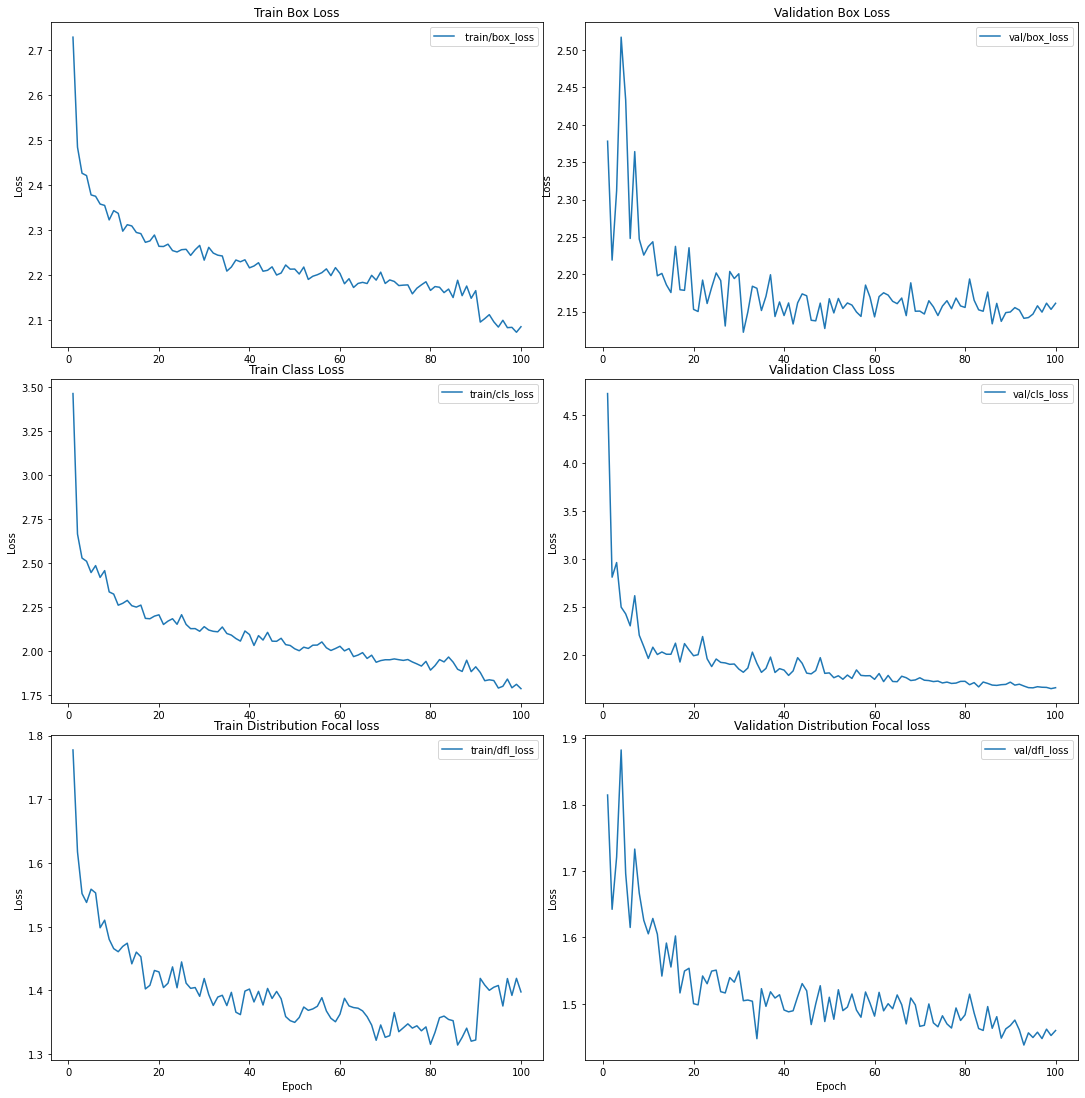

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.tight_layout()

# train/box_loss
axes[0, 0].plot(df['epoch'], df['train/box_loss'], label=' train/box_loss')
axes[0, 0].set_title('Train Box Loss')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

# val/box_loss
axes[0, 1].plot(df['epoch'], df['val/box_loss'], label='val/box_loss')
axes[0, 1].set_title('Validation Box Loss')
axes[0, 1].set_ylabel('Loss')
axes[0, 1].legend()

# train/cls_loss
axes[1, 0].plot(df['epoch'], df['train/cls_loss'], label='train/cls_loss')
axes[1, 0].set_title('Train Class Loss')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

# val/cls_loss
axes[1, 1].plot(df['epoch'], df['val/cls_loss'], label='val/cls_loss')
axes[1, 1].set_title('Validation Class Loss')
axes[1, 1].set_ylabel('Loss')
axes[1, 1].legend()

# train/dfl_loss
axes[2, 0].plot(df['epoch'], df['train/dfl_loss'], label='train/dfl_loss')
axes[2, 0].set_title('Train Distribution Focal loss')
axes[2, 0].set_xlabel('Epoch')
axes[2, 0].set_ylabel('Loss')
axes[2, 0].legend()

# val/dfl_loss
axes[2, 1].plot(df['epoch'], df['val/dfl_loss'], label='val/dfl_loss')
axes[2, 1].set_title('Validation Distribution Focal loss')
axes[2, 1].set_xlabel('Epoch')
axes[2, 1].set_ylabel('Loss')
axes[2, 1].legend()

plt.show()

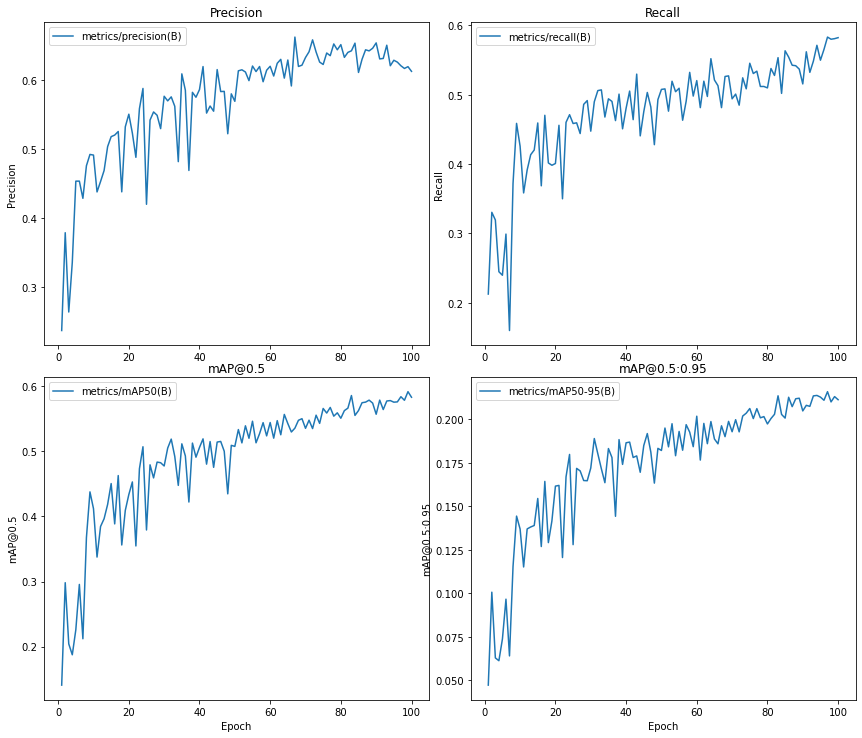

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.tight_layout()

# metrics/precision(B)
axes[0, 0].plot(df['epoch'], df['metrics/precision(B)'], label='metrics/precision(B)')
axes[0, 0].set_title('Precision')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].legend()

# metrics/recall(B)
axes[0, 1].plot(df['epoch'], df['metrics/recall(B)'], label='metrics/recall(B)')
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].legend()

# График для metrics/mAP50(B)
axes[1, 0].plot(df['epoch'], df['metrics/mAP50(B)'], label='metrics/mAP50(B)')
axes[1, 0].set_title('mAP@0.5')
axes[1, 0].set_ylabel('mAP@0.5')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].legend()

# metrics/mAP50-95(B)
axes[1, 1].plot(df['epoch'], df['metrics/mAP50-95(B)'], label='metrics/mAP50-95(B)')
axes[1, 1].set_title('mAP@0.5:0.95')
axes[1, 1].set_ylabel('mAP@0.5:0.95')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].legend()

plt.show()

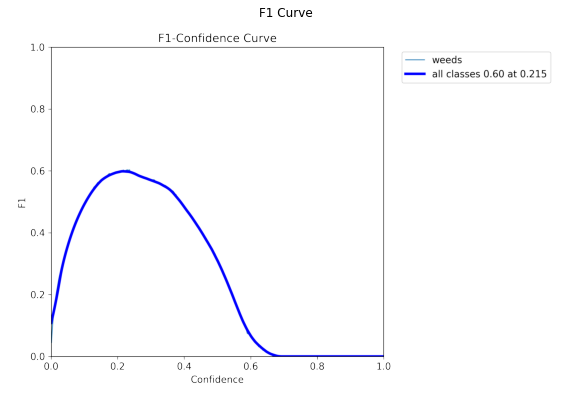

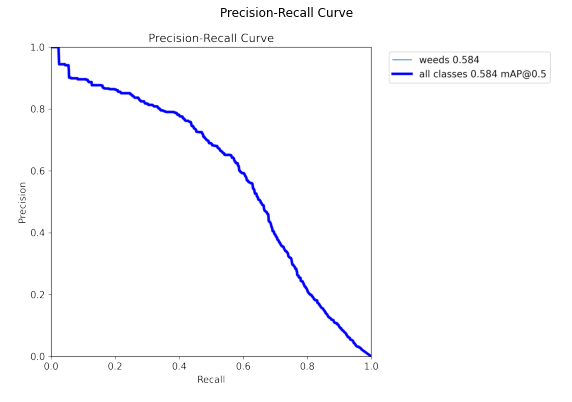

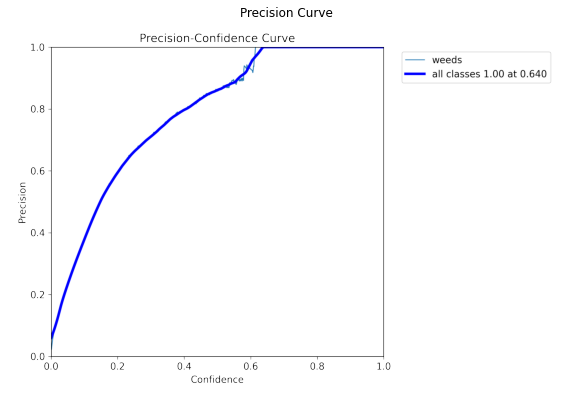

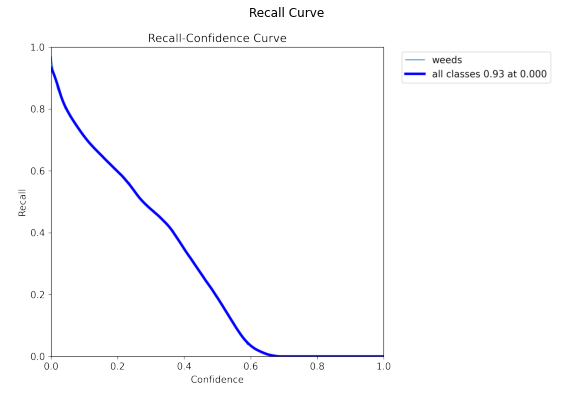

In [9]:
# F1_curve.png
f1_curve = Image.open("YOLO11s/4_aug_high_res/F1_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(f1_curve)
plt.title("F1 Curve")
plt.axis("off")
plt.show()

# PR_curve.png
pr_curve = Image.open("YOLO11s/4_aug_high_res/PR_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(pr_curve)
plt.title("Precision-Recall Curve")
plt.axis("off")
plt.show()

# P_curve.png
p_curve = Image.open("YOLO11s/4_aug_high_res/P_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(p_curve)
plt.title("Precision Curve")
plt.axis("off")
plt.show()

# R_curve.png
r_curve = Image.open("YOLO11s/4_aug_high_res/R_curve.png")
plt.figure(figsize=(10, 10))
plt.imshow(r_curve)
plt.title("Recall Curve")
plt.axis("off")
plt.show()

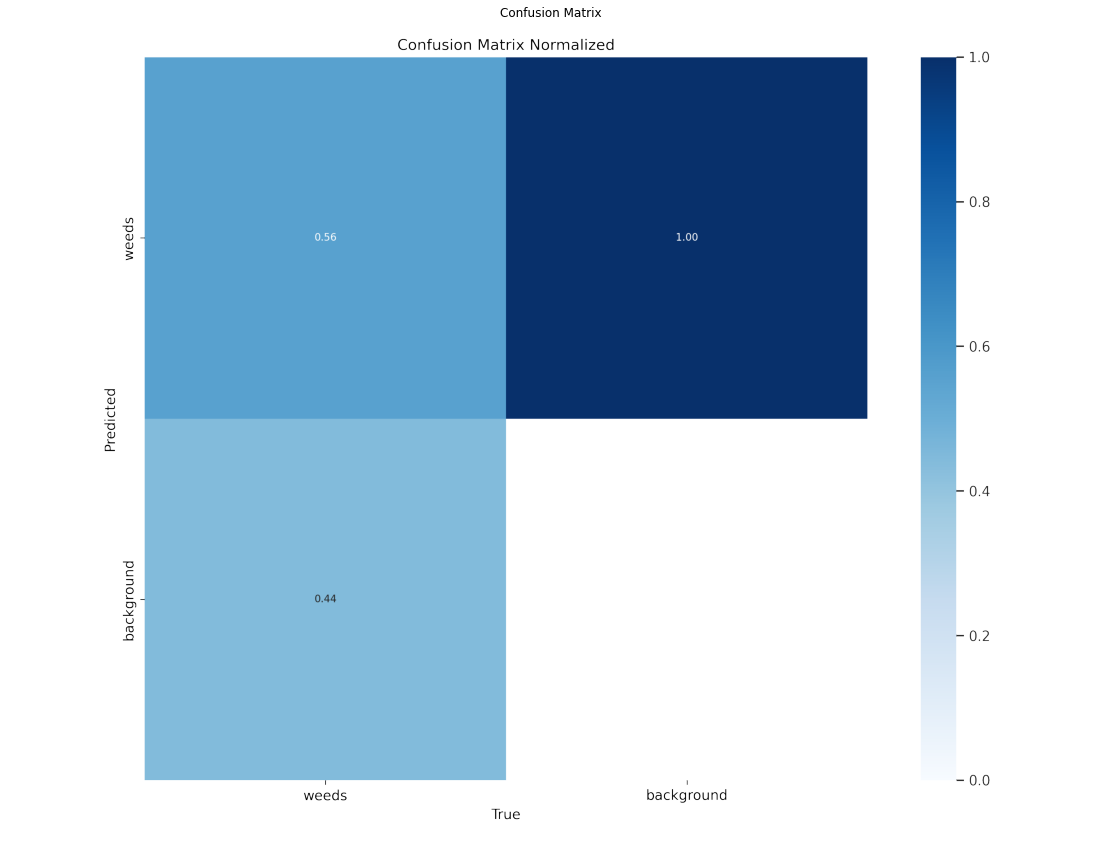

In [10]:
confusion_matrix = Image.open("YOLO11s/4_aug_high_res/confusion_matrix_normalized.png")
plt.figure(figsize=(20, 15))
plt.imshow(confusion_matrix)
plt.title("Confusion Matrix")
plt.axis("off")
plt.show()


image 1/1 /home/user/CourseWork/Weed_UAV/test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg: 640x640 1 weeds, 9.7ms
Speed: 1.9ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


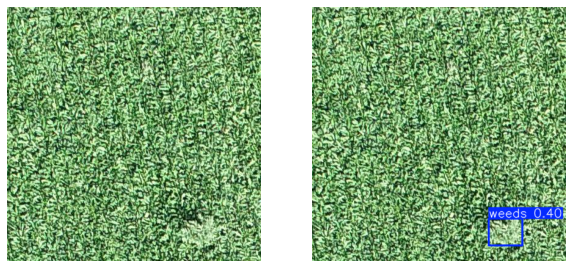

In [11]:
res = model('test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg')
detect_img = res[0].plot()
detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Отображение первого изображения
axes[0].imshow(plt.imread('test/images/DJI_0085_2_5_JPG.rf.ca06e9bbefb720419106bb88e431a157.jpg'))
axes[0].axis('off')

# Отображение результатов модели
axes[1].imshow(detect_img)
axes[1].axis('off')

plt.show();